<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#损失函数" data-toc-modified-id="损失函数-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>损失函数</a></span><ul class="toc-item"><li><span><a href="#均方误差" data-toc-modified-id="均方误差-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>均方误差</a></span></li><li><span><a href="#交叉熵误差" data-toc-modified-id="交叉熵误差-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>交叉熵误差</a></span></li><li><span><a href="#mini-batch学习" data-toc-modified-id="mini-batch学习-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>mini-batch学习</a></span></li></ul></li><li><span><a href="#数值微分" data-toc-modified-id="数值微分-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>数值微分</a></span><ul class="toc-item"><li><span><a href="#导数" data-toc-modified-id="导数-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>导数</a></span></li><li><span><a href="#梯度" data-toc-modified-id="梯度-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>梯度</a></span></li><li><span><a href="#梯度下降" data-toc-modified-id="梯度下降-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>梯度下降</a></span></li></ul></li><li><span><a href="#两层神经网络实现（SGD）" data-toc-modified-id="两层神经网络实现（SGD）-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>两层神经网络实现（SGD）</a></span></li></ul></div>

# 损失函数

## 均方误差

In [1]:
import numpy as np

def mean_square_error(y, t):
    return 0.5 * np.sum((y - t) ** 2)

## 交叉熵误差
$$ (E = - \sum\limits _ { k }  t _ { k } \log y _ { k }  ) $$

In [2]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

## mini-batch学习
$$ E = - \frac { 1 } { N } \sum\limits _ { n }\sum\limits_{k} t _ { nk} \log y _ { nk }    $$

In [10]:
"""读取数据"""

from dataset.mnist import load_mnist
import numpy as np
import sys
import os
sys.path.append(os.pardir)


(x_train, t_train), (x_test, t_test) = load_mnist(
    normalize=True, one_hot_label=True)
print(x_train.shape)
print(t_train[0])

(60000, 784)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [12]:
"""随机获取mini_batch"""

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)

x_batch = x_train[batch_mask]
y_batch = t_train[batch_mask]

In [13]:
"""同时处理多个数据的交叉熵误差"""

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size


In [29]:
"""监督数据是标签，one-hot"""

def cross_entropy_error_lable(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

# 数值微分

## 导数

In [31]:
def mumerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2 * h)

## 梯度

In [46]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        
    return grad

## 梯度下降

In [47]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

# 两层神经网络实现（SGD）

In [49]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 初始化权重
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x:输入数据, t:监督数据
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:输入数据, t:监督数据
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

:::	0	::train acc, test acc | 0.11236666666666667, 0.1135
:::	600	::train acc, test acc | 0.7900833333333334, 0.7963
:::	1200	::train acc, test acc | 0.87715, 0.8821
:::	1800	::train acc, test acc | 0.89795, 0.9021
:::	2400	::train acc, test acc | 0.9092666666666667, 0.9116
:::	3000	::train acc, test acc | 0.91525, 0.9193
:::	3600	::train acc, test acc | 0.9205166666666666, 0.9232
:::	4200	::train acc, test acc | 0.9230666666666667, 0.9264
:::	4800	::train acc, test acc | 0.9281166666666667, 0.9297
:::	5400	::train acc, test acc | 0.9326, 0.9333
:::	6000	::train acc, test acc | 0.93555, 0.9359
:::	6600	::train acc, test acc | 0.9374833333333333, 0.9379
:::	7200	::train acc, test acc | 0.9394333333333333, 0.9396
:::	7800	::train acc, test acc | 0.9425166666666667, 0.9414
:::	8400	::train acc, test acc | 0.9446333333333333, 0.9441
:::	9000	::train acc, test acc | 0.9459, 0.9448
:::	9600	::train acc, test acc | 0.9469666666666666, 0.9457


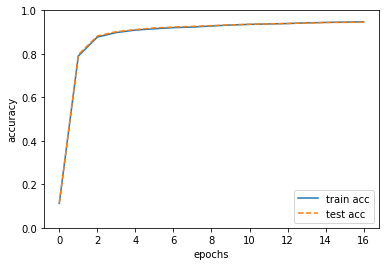

In [61]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

# 读入数据
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000  # 适当设定循环的次数
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 计算梯度
#     grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 更新参数
#     print(grad["W1"].shape)
    
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(":::\t"+str(i)+"\t::train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 绘制图形
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()